# Алгоритм Adam

In [5]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.0005)


def load_train(path):
    features_train = np.load(path + 'train_features.npy')
    target_train = np.load(path + 'train_target.npy')
    features_train = features_train.reshape(-1, 28, 28, 1)
    features_train = features_train/255.0
    return features_train, target_train


def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same',
                 activation="relu", input_shape=input_shape))
    model.add(AvgPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=16, kernel_size=(5,5),activation="relu"))

    model.add(AvgPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model


def train_model(model, train_data, test_data, batch_size=32, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    features_train, target_train = train_data
    features_test, target_test = test_data
    model.fit(features_train, target_train, 
              validation_data=(features_test, target_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model 

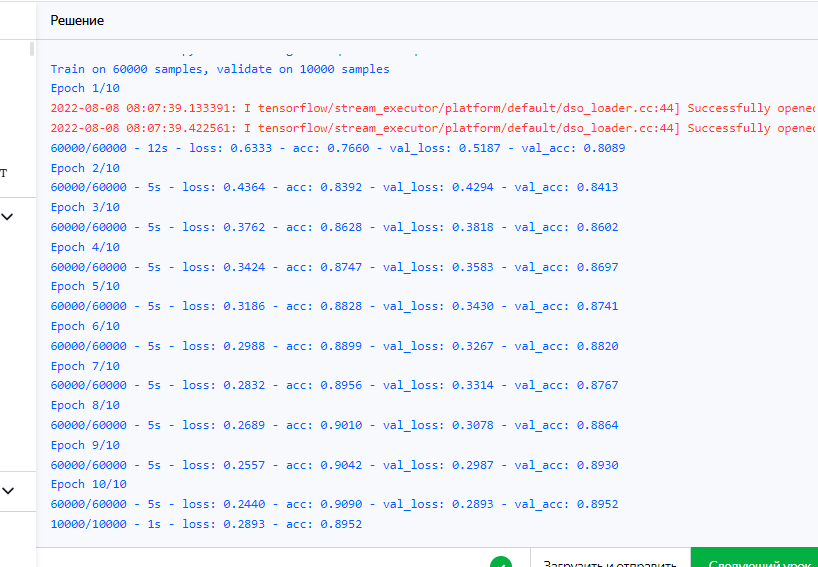